In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [5]:
# Load the dataset
file_path = "train.csv"  # Path to your dataset file
data = pd.read_csv(file_path)

# Filter data where building_id = 1 and meter = 0
filtered_data = data[(data['building_id'] == 1) & (data['meter'] == 0)]

# Select the 'meter_reading' column after filtering
meter_reading = filtered_data['meter_reading'].values

# Check the first few rows of filtered data
print(filtered_data.head())
print(filtered_data.size)

      building_id  meter            timestamp  meter_reading
1               1      0  2016-01-01 00:00:00            0.0
2302            1      0  2016-01-01 01:00:00            0.0
4595            1      0  2016-01-01 02:00:00            0.0
6894            1      0  2016-01-01 03:00:00            0.0
9190            1      0  2016-01-01 04:00:00            0.0
35136


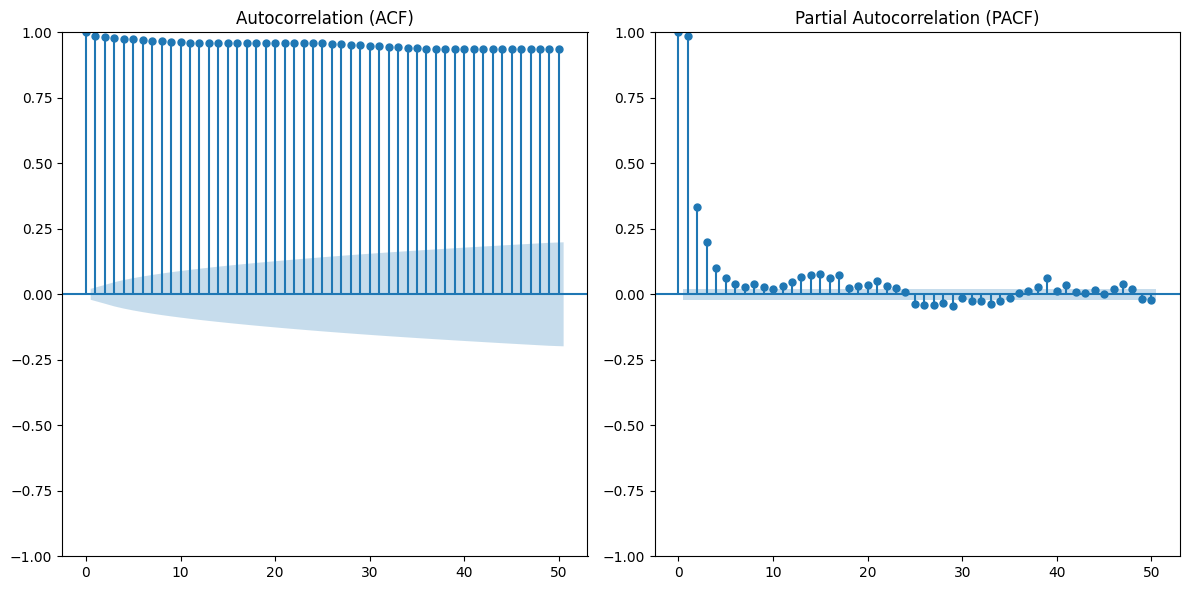

In [6]:
# Plot ACF and PACF to check for lags
plt.figure(figsize=(12, 6))

# Plot ACF
plt.subplot(1, 2, 1)
plot_acf(meter_reading, lags=50, ax=plt.gca())
plt.title("Autocorrelation (ACF)")

# Plot PACF
plt.subplot(1, 2, 2)
plot_pacf(meter_reading, lags=50, ax=plt.gca(), method='ywm')
plt.title("Partial Autocorrelation (PACF)")

# Show the plots
plt.tight_layout()
plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(meter_reading)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
if result[1] < 0.05:
    print("Data is stationary.")
else:
    print("Data is not stationary. Consider differencing.")

ADF Statistic: -2.3964131855126287
p-value: 0.1427513208317343
Data is not stationary. Consider differencing.


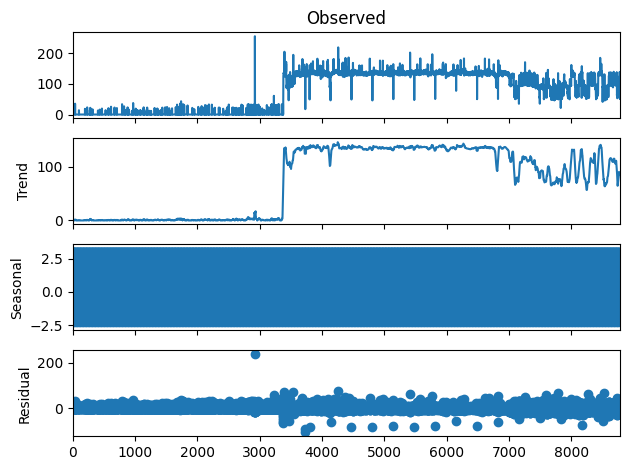

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(meter_reading, model='additive', period=24)  # Assuming hourly data
result.plot()
plt.show()

In [9]:
meter_reading_smoothed = pd.Series(meter_reading).rolling(window=24).mean().dropna()

In [11]:
import numpy as np
diff_data = np.diff(meter_reading, n=1)